In [2]:
import astropy
from astropy.time import Time
import numpy as np
from astropy import units as u
from datetime import datetime, timedelta
import astropy.coordinates



In [3]:
start = Time("2025-01-01")
end = Time("2025-10-01")
duration = end - start
times = start + np.linspace(0, (end - start).to_value('day'), 100) * u.day

In [89]:
from astropy.coordinates import solar_system_ephemeris, EarthLocation
from astropy.coordinates import get_body_barycentric, get_body
from astropy.coordinates import SkyCoord
location = EarthLocation.of_site('Greenwich')
jupiter = []
jupiter_coords = []
earth_coords = []

for time in times:
    x = get_body("Jupiter", time,location )
    y = get_body("Earth", time)
    jupiter.append(x)
    jupiter_coords.append([x.ra.degree, x.dec.degree])
    earth_coords.append([y.ra.degree, y.dec.degree])

jupiter_positions = np.array(jupiter_coords)
earth_positions = np.array(earth_coords)



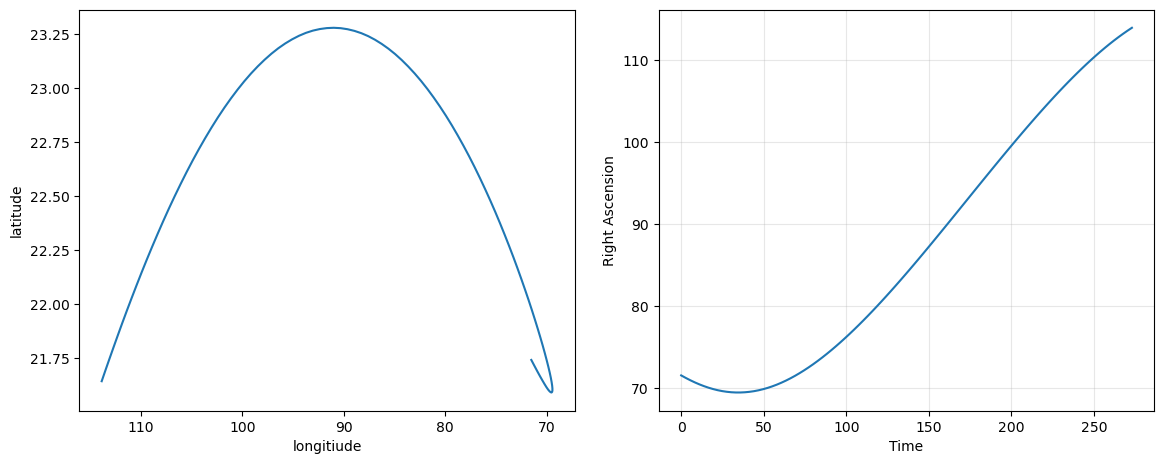

In [90]:
import matplotlib.pyplot as plt
fig,(ax1,ax2) = plt.subplots(1,2 , figsize =(12,5))
ax1.plot(jupiter_positions[:,0] ,  jupiter_positions[:,1])
ax1.invert_xaxis()
ax1.set_xlabel("longitiude")
ax1.set_ylabel("latitude")
days_from_start = np.linspace(0, (end - start).to_value('day'), 100)


ax2.plot(days_from_start, jupiter_positions[:,0])
ax2.set_ylabel("Right Ascension")
ax2.set_xlabel("Time")
ax2.grid(True, alpha=0.3)
fig.tight_layout(pad = 2)
plt.show()

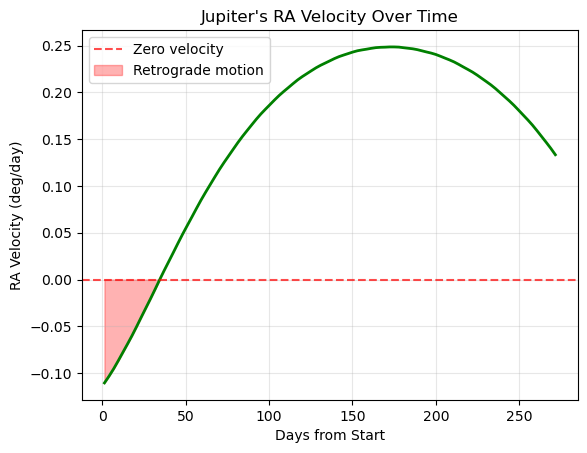

In [105]:
def fix_ra_manually(ra_value):
    ra_fixed = ra_value.copy()
    
    for i in range(1, len(ra_value)):
        diff = ra_value[i] - ra_value[i-1]
        
        if diff > 180:
            
            ra_fixed[i:] -= 360
        elif diff < -180:
            #
            ra_fixed[i:] += 360
    
    return ra_fixed

jupiter_ra_wrap = fix_ra_manually(jupiter_positions[:,0])
ra_time = np.diff(days_from_start)
ra_velocity = np.diff(jupiter_ra_wrap)/ra_time

retro = np.where(ra_velocity<0)[0]
retro_time = []
for i in retro:
    retro_time.append(times[i])

fig,ax3 = plt.subplots()
velocity_times = days_from_start[:-1] + np.diff(days_from_start)/2  # Mid-points
ax3.plot(velocity_times, ra_velocity, 'g-', linewidth=2)
ax3.axhline(y=0, color='r', linestyle='--', alpha=0.7, label='Zero velocity')
ax3.fill_between(velocity_times, ra_velocity, 0, where=(ra_velocity < 0), 
                 alpha=0.3, color='red', label='Retrograde motion')
ax3.set_xlabel("Days from Start")
ax3.set_ylabel("RA Velocity (deg/day)")
ax3.set_title("Jupiter's RA Velocity Over Time")
ax3.grid(True, alpha=0.3)
ax3.legend()
